<a href="https://colab.research.google.com/github/harvydavies/LCO-code/blob/main/Workingcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0      0.179080
1      0.034017
2      0.049757
3      0.034168
4      0.054990
         ...   
900    0.192790
901    0.066138
902    0.081822
903    0.041253
904    0.049855
Name: MAGERR_ISO_2, Length: 905, dtype: float64


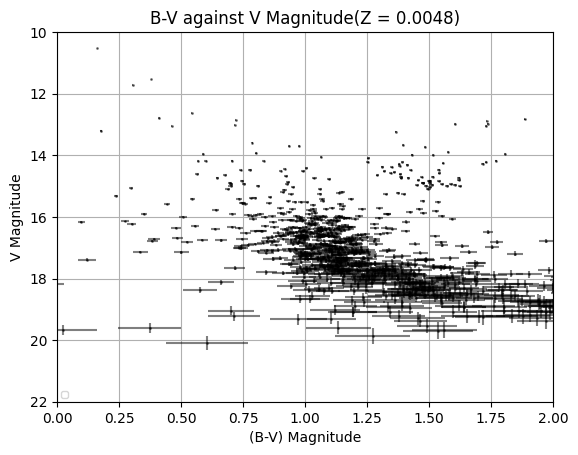

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


data = np.loadtxt('/content/iso0004-1e10.dat')

# Assuming columns for V magnitude, B magnitude, and log age are at indices 31, 32, and 2 respectively
iv_mag = data[:, 30] + 5*np.log10(3600) -5
ib_mag = data[:, 29] + 5*np.log10(3600) -5
log_age = data[:, 2]

# Calculate B-V magnitude
ib_v_mag = ib_mag - iv_mag

# Define the range you want to keep for iv_mag
min_range = 0
max_range = 21

# Filter the data based on the range
mask = np.logical_and(iv_mag >= min_range, iv_mag <= max_range)
filtered_iv = iv_mag[mask]
filtered_ibv = ib_v_mag[mask]

df = pd.read_csv('/content/final_matches27april.csv')
b_magall = df['MAG_ISO_2_B']
v_magall = df['MAG_ISO_1_V']
b_magall2err = df['MAGERR_ISO_2']
v_magall2err = df['MAGERR_ISO_1_V']
bv_magall2err = np.sqrt(b_magall2err**2 + v_magall2err**2)
print(b_magall2err)


# Convert lists to numpy arrays
b_magall2 = b_magall #- 5*np.log10(3600) +5
#b_error = np.array(b_error)
v_magall2 = v_magall #- 5*np.log10(3600) +5
#v_error = np.array(v_error)

# Calculate B-V magnitude
b_v_magall = b_magall2 - v_magall2
#b_v_error = np.sqrt(b_error**2 + v_error**2)  # Error propagation


# Load data from the file
data = np.loadtxt('/content/isoexactGiovanniPaper.dat')

# Assuming columns for V magnitude, B magnitude, and log age are at indices 31, 32, and 2 respectively
v_mag = data[:, 30] + 5*np.log10(3600) -5
b_mag = data[:, 29] + 5*np.log10(3600) -5
log_age = data[:, 2]

# Calculate B-V magnitude
b_v_mag = b_mag - v_mag

# Filter data points with B-V magnitude less than 2 (1.4+ 0.6 later added during plotting)
filtered_indices = np.where((b_v_mag <= 2.5-0.6) & (v_mag <= 22.5-1.3) & ~((b_v_mag >= 1.8-0.6) &(v_mag>=14-1.3) & (v_mag<=16-1.3)))
v_mag = v_mag[filtered_indices]
b_v_mag = b_v_mag[filtered_indices]
log_age = log_age[filtered_indices]


# Get unique log ages and assign colors
unique_log_ages = np.unique(log_age)
min_log_age = 9.2
max_log_age = 9.3
log_age_interval = 0.1
log_ages_to_plot = np.arange(min_log_age, max_log_age + log_age_interval, log_age_interval)
num_ages = len(log_ages_to_plot)
colors = plt.cm.viridis(np.linspace(0, 1, num_ages))
colors = ['b','g','r']
'''
# Plot B-V against V magnitude with color-coded points
plt.figure(figsize=(3, 5))  # Adjust figure size as needed
for i, log_age_val in enumerate(log_ages_to_plot):
    mask = np.isclose(log_age, log_age_val, atol=0.0)  # Filter by approximate equality to the log age within a tolerance
    # Make UBV data points translucent
    if np.any(mask):
        #plt.scatter(b_v_mag[mask]+0.65, v_mag[mask]+1.5, label=f'log(age)={log_age_val:.1f}', color=colors[i], alpha = 0, s=5)
        plt.plot(b_v_mag[mask]+0.65, v_mag[mask]+1.5, linestyle = '-', label=f'log(age)={log_age_val:.1f}', color=colors[i], alpha = 0.6, linewidth=1.0)

# Read data from LCOBdata file
with open("b_byhand.Dat", "r") as f:
    lines = f.readlines()
    b_magnitude = []
    b_error = []
    for line in lines[3:]:
        elements = line.split()
        if len(elements) >= 5:
            b_magnitude.append(float(elements[3]))
            b_error.append(float(elements[4]))

# Read data from LCOVdata file
with open("v_byhand.Dat", "r") as f:
    lines = f.readlines()
    v_magnitude = []
    v_error = []
    for line in lines[3:]:
        elements = line.split()
        if len(elements) >= 5:
            v_magnitude.append(float(elements[3]))
            v_error.append(float(elements[4]))


# Convert lists to numpy arrays
b_magnitude = np.array(b_magall)
#b_error = np.array(b_error)
v_magnitude = np.array(v_magall)
#v_error = np.array(v_error)

b_magnitude1 = b_magnitude - 5*np.log10(3600) +5
#b_error = np.array(b_error)
v_magnitude1 = v_magnitude - 5*np.log10(3600) +5

# Calculate B-V magnitude
b_v_magnitude = b_magnitude1 - v_magnitude1
#b_v_error = np.sqrt(b_error**2 + v_error**2)  # Error propagation

# Plot B-V against V magnitude with error bars
#plt.errorbar(b_v_magnitude, v_magnitude1, xerr=v_error, yerr=b_v_error, fmt='o', markersize=4, color='blue')
'''

#plt.plot(filtered_ibv+0.6, filtered_iv+1.3, marker = '.', markersize = '1', linestyle = '-', label = 'isochrone(Z=0.004, age = 9.38e9)')

#plt.figure(figsize=(3, 5))
#plt.plot(b_v_magall, v_magall2, marker = '.', markersize = '1.5', linestyle = '', color = '0', label = 'data')

plt.errorbar(b_v_magall, v_magall2, xerr=v_magall2err, yerr=np.abs(bv_magall2err), fmt='o', markersize=1, color='0', alpha = 0.5)

# Add legend with labels
#plt.legend(title='Log Age', loc='lower left', fontsize='small')

# Add labels indicating log age
#for i, log_age_val in enumerate(log_ages_to_plot):
   # plt.text(plt.xlim()[1] + 0.05, plt.ylim()[1] - i * 0.2, f'log(age)={log_age_val:.1f}', color=colors[i])


plt.xlabel('(B-V) Magnitude')
plt.ylabel('V Magnitude')
plt.title('B-V against V Magnitude(Z = 0.0048)')
#plt.ylim(-1,12)
plt.ylim(10,22)
plt.xlim(0,2)
plt.grid(True)
plt.gca().invert_yaxis()
plt.legend(loc='lower left', fontsize='6')
plt.show()